# PENDEKATAN MACHINE LEARNING

### Link dataset : https://docs.google.com/spreadsheets/d/15HDXsDWn4AMPe-dO-yJ8ENIOOThimtkw5LW7DfhCd4c/edit#gid=877757415

## MENGIMPORT LIBRARY

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, adjusted_rand_score, normalized_mutual_info_score, homogeneity_score, completeness_score, v_measure_score, mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv("autos.csv")
df.drop(df.index[1500:370325], inplace=True)

In [3]:
strategi1 = SimpleImputer(strategy="most_frequent")

kolom_isinull = ['model','vehicleType','gearbox','fuelType','notRepairedDamage']

df[kolom_isinull] = strategi1.fit_transform(df[kolom_isinull])



In [4]:
strategi2 = SimpleImputer(strategy="median")

df["price"] = strategi2.fit_transform(df[["price"]])


In [5]:
strategi3 = SimpleImputer(strategy="mean")

df["kilometer"] = strategi3.fit_transform(df[["kilometer"]])


In [6]:
one_encoder = OneHotEncoder(sparse=False)

df["fuelType"] = one_encoder.fit_transform(df[["fuelType"]])
df.head()

D:\SEMESTER 5\Praktikum KB\POSTTEST1\venv_C2-21\ihsan_135\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,index,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,...,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480.0,test,limousine,1993,manuell,...,golf,150000.0,0,0.0,volkswagen,nein,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300.0,test,coupe,2011,manuell,...,golf,125000.0,5,0.0,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800.0,test,suv,2004,automatik,...,grand,125000.0,8,0.0,jeep,nein,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500.0,test,kleinwagen,2001,manuell,...,golf,150000.0,6,0.0,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600.0,test,kleinwagen,2008,manuell,...,fabia,90000.0,7,0.0,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


## MENGURANGI DATA KARENA KEBANYAKAN

## Supervised Learning


## SVM digunakan pada label kategorikal dan mengambil 2 fitur untuk binary clasification

In [30]:
X = df[['price', 'yearOfRegistration']]
y = df['gearbox']

## memetakan kelas target ke label biner

In [8]:
y = np.where(y == 'Belgian', 1, -1)

## membagi data ke train set dan test set

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## membuat objek classifier SVM

In [10]:
svm = SVC(kernel="linear")

## melatih data dengan data train

In [11]:
svm.fit(X_train, y_train)

ValueError: The number of classes has to be greater than one; got 1 class

## prediksi data test dengan model

In [12]:
y_pred = svm.predict(X_test)

AttributeError: 'SVC' object has no attribute 'support_vectors_'

## menyimpan nilai support vector dan indeksnya

In [13]:
support_vectors = svm.support_vectors_
support_vector_indices = np.where(np.isin(X_train, support_vectors).all(axis=1))

AttributeError: 'SVC' object has no attribute 'support_vectors_'

## Plotting menggunakan scatter dari Seaborn dan menampilkan titik titik support vector, lalu membuat garis decision boundary, meshgrid untuk evaluasi model, grafik decision boundary dan garis margin serta menambahkan label dan legenda

NameError: name 'support_vectors' is not defined

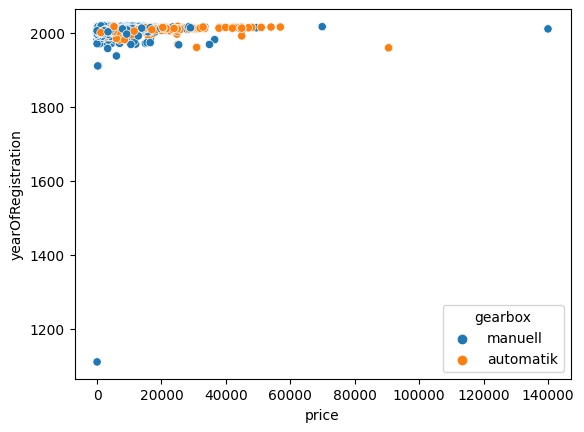

In [14]:
sns.scatterplot(x='price', y='yearOfRegistration', hue='gearbox', data=df)
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=40, color='cyan', marker='+', label='Support Vectors')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1]), np.linspace(ylim[0], ylim[1]))
Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
linestyles=['--', '-', '--'])
plt.xlabel('price')
plt.ylabel('yearOfRegistration')
plt.legend(loc='lower right')
plt.title('SVM dengan Support Vectors')
plt.show()

## Melihat 4 nilai metriks dengan menggunakan library dari Scikit-Learn yaitu Classification Report.

In [15]:
report = classification_report(y_test, y_pred)
print(report)

NameError: name 'y_pred' is not defined

## Linear Regression

## memisahkan fitur dan target dari dataset

In [16]:
X, y = df[['price']], df['yearOfRegistration']

## mentraining data fitur dan target

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31)

## Membuat model regresi linear, melatih model dengan data training dan menggunakan model untuk membuat prediksi pada data test

In [18]:
reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

## Visualisasi hasil prediksi regresi linear pada data test yang membandingkan prediksi (garis biru) dengan data asli (titik hitam) untuk melihat sejauh mana model cocok dengan data aktual

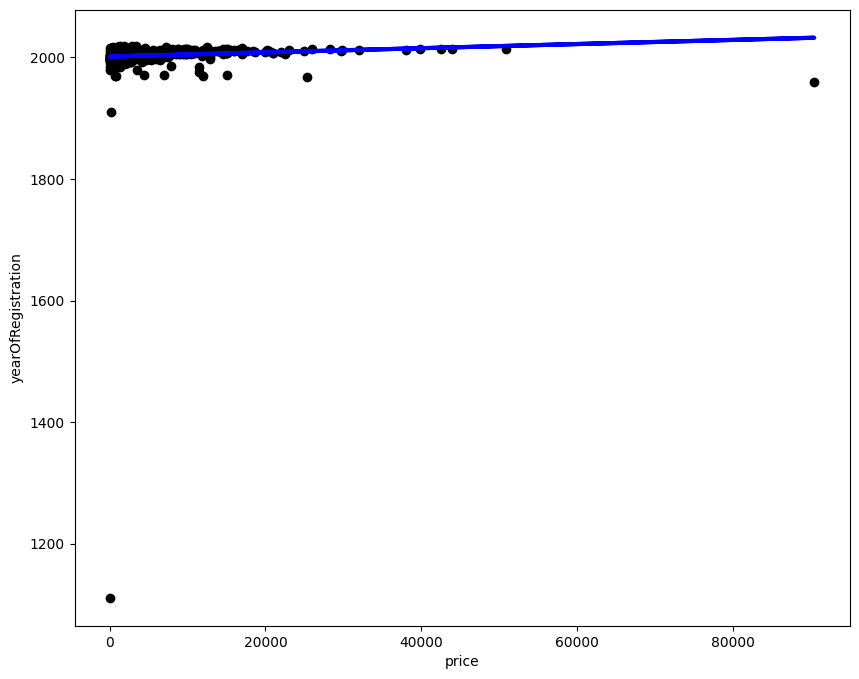

In [19]:
plt.figure(figsize=(10,8))
plt.plot(X_test, y_pred, c='blue', linewidth=3)
plt.scatter(X_test, y_test, c='Black')
plt.xlabel("price")
plt.ylabel("yearOfRegistration")
plt.show()

## Membuat objek classifier SVM

In [20]:
svm = SVC(kernel="linear")

## Melatih classifier

In [ ]:
svm.fit(X_train, y_train)

## melakukan prediksi data test dengan model dan menampilkan hasil

In [21]:
y_pred = svm.predict(X_test)
print("MAE :", mean_absolute_error(y_test, y_pred))
print("MSE :", mean_squared_error(y_test, y_pred))
print("RMSE :", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R-Squared :", r2_score(y_test, y_pred))

NotFittedError: This SVC instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

# UNSUPERVISED LEARNING

## K-Means

## Menggunakan fitur X dan menentukan banyaknya kelompok

In [22]:
X = df[["price", "yearOfRegistration"]]
K = 2

## Inisialisasi K-Means dan melatih model K-Means berdasarkan data X

In [23]:
kmeans = KMeans(n_clusters=K, n_init=10)
kmeans.fit(X)

KMeans(n_clusters=2, n_init=10)

## Membuat label kelompok dari model dan tambah kolom prediksi serta titik pusat kelompok dari model

In [24]:
cluster_labels = kmeans.labels_
df["cluster"] = cluster_labels
centroids = kmeans.cluster_centers_

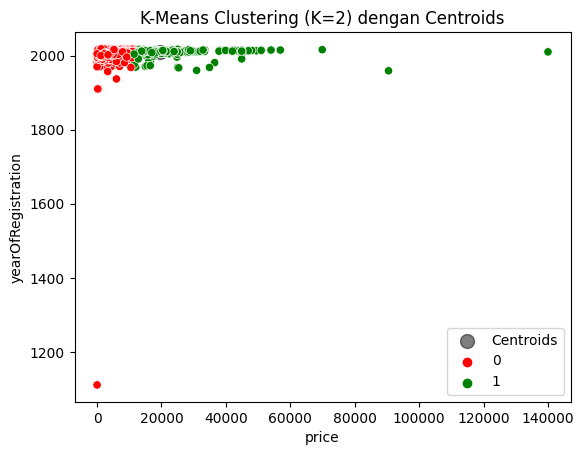

In [25]:
plt.scatter(centroids[:, 0], centroids[:, 1], alpha=0.5, c='black', s=100, label='Centroids')
sns.scatterplot(data=df, x="price", y="yearOfRegistration", hue="cluster", palette=["red", "green"])
plt.title(f"K-Means Clustering (K={K}) dengan Centroids")
plt.xlabel("price")
plt.ylabel("yearOfRegistration")
plt.legend()
plt.show()

## Membuat crosstab untuk membandingkan cluster labels dengan true labels

In [26]:
cross_tab = pd.crosstab(df["cluster"], df["gearbox"])
print("Cross-Tabulation:")
print(cross_tab, "\n")

Cross-Tabulation:
gearbox  automatik  manuell
cluster                    
0              354     1960
1              180      209 



## Menghitung dan mencetak nilai "Adjusted Rand Index (ARI)" yang mengukur sejauh mana clustering dengan algoritma K-Means

In [27]:
ari = adjusted_rand_score(df["gearbox"], cluster_labels)
print(f"Adjusted Rand Index (ARI): {ari:.2f}")

Adjusted Rand Index (ARI): 0.19


## Menghitung dan mencetak nilai "Normalized Mutual Information (NMI)" untuk mengevaluasi sejauh mana hasil clustering dengan algoritma K-Means

In [28]:
true_labels_num = df["gearbox"].astype("category").cat.codes
nmi = normalized_mutual_info_score(true_labels_num, cluster_labels)
print(f"Normalized Mutual Information (NMI): {nmi:.2f}")

Normalized Mutual Information (NMI): 0.07


## Homogeneity, Completeness dan V-Measure membantu mengukur sejauh mana hasil klustering sesuai dengan label asli data dan seberapa baik klustering tersebut dalam mengelompokkan data

In [29]:
homogeneity = homogeneity_score(df["gearbox"], cluster_labels)
completeness = completeness_score(df["gearbox"], cluster_labels)
v_measure = v_measure_score(df["gearbox"], cluster_labels)
print(f"Homogeneity Score: {homogeneity:.2f}")
print(f"Completeness Score: {completeness:.2f}")
print(f"V-Measure Score: {v_measure:.2f}")

Homogeneity Score: 0.06
Completeness Score: 0.08
V-Measure Score: 0.07
